In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [57]:
df = pd.read_csv('heart_attack.csv')

In [58]:
df


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [59]:
df = df.rename(columns={'Patient ID': 'patient_id','Age':'age', 'Sex':'sex','Cholesterol':'cholesterol','Blood Pressure':'blood_pressure','Heart Rate':'heart_rate','Diabetes':'diabetes','Family History':'fam_hist','Smoking':'smoking','Obesity':'obesity','Sedentary Hours Per Day':'sed_hour_day','Income':'income','Triglycerides':'triglycerides','Physical Activity Days Per Week':'activity_per_week','Sleep Hours Per Day':'sleep_day','Country':'country','Continent':'continent','Hemisphere':'hemisphere', 'Heart Attack Risk': 'heart_attack_risk'})

In [60]:
df = df.rename(columns={'Alcohol Consumption':'alcohol_consu', 'Exercise Hours Per Week':'exer_hour_week','Previous Heart Problems':'prev_heart_prob',
       'Medication Use':'medication_use', 'Stress Level':'stress_lvl','Diet':'diet'})

In [61]:
df.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'fam_hist', 'smoking', 'obesity',
       'alcohol_consu', 'exer_hour_week', 'diet', 'prev_heart_prob',
       'medication_use', 'stress_lvl', 'sed_hour_day', 'income', 'BMI',
       'triglycerides', 'activity_per_week', 'sleep_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk'],
      dtype='object')

In [62]:
df


,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,fam_hist,smoking,obesity,...,sed_hour_day,income,BMI,triglycerides,activity_per_week,sleep_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [63]:
df = df.drop(columns=['obesity','sed_hour_day','hemisphere','patient_id','blood_pressure'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                8763 non-null   int64  
 1   sex                8763 non-null   object 
 2   cholesterol        8763 non-null   int64  
 3   heart_rate         8763 non-null   int64  
 4   diabetes           8763 non-null   int64  
 5   fam_hist           8763 non-null   int64  
 6   smoking            8763 non-null   int64  
 7   alcohol_consu      8763 non-null   int64  
 8   exer_hour_week     8763 non-null   float64
 9   diet               8763 non-null   object 
 10  prev_heart_prob    8763 non-null   int64  
 11  medication_use     8763 non-null   int64  
 12  stress_lvl         8763 non-null   int64  
 13  income             8763 non-null   int64  
 14  BMI                8763 non-null   float64
 15  triglycerides      8763 non-null   int64  
 16  activity_per_week  8763 

In [65]:
len(df)

8763

In [66]:
df.describe()

,age,cholesterol,heart_rate,diabetes,fam_hist,smoking,alcohol_consu,exer_hour_week,prev_heart_prob,medication_use,stress_lvl,income,BMI,triglycerides,activity_per_week,sleep_day,heart_attack_risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.598083,10.014284,0.495835,0.498345,5.469702,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.490313,5.783745,0.500011,0.500026,2.859622,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,4.981579,0.000000,0.000000,3.000000,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [67]:
df.columns

Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'fam_hist',
       'smoking', 'alcohol_consu', 'exer_hour_week', 'diet', 'prev_heart_prob',
       'medication_use', 'stress_lvl', 'income', 'BMI', 'triglycerides',
       'activity_per_week', 'sleep_day', 'country', 'continent',
       'heart_attack_risk'],
      dtype='object')

In [68]:
df['sex'].value_counts()

Male      6111
Female    2652
Name: sex, dtype: int64

In [69]:
df['diet'].value_counts()

Healthy      2960
Average      2912
Unhealthy    2891
Name: diet, dtype: int64

In [70]:
df['medication_use'].value_counts()

0    4396
1    4367
Name: medication_use, dtype: int64

In [71]:
df['diabetes'].value_counts()

1    5716
0    3047
Name: diabetes, dtype: int64

In [72]:
df['alcohol_consu'].value_counts()

1    5241
0    3522
Name: alcohol_consu, dtype: int64

In [73]:
df['smoking'].value_counts()

1    7859
0     904
Name: smoking, dtype: int64

In [74]:
df.groupby('sex').mean()

<ipython-input-74-e22e9959c4d5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').mean()


,age,cholesterol,heart_rate,diabetes,fam_hist,smoking,alcohol_consu,exer_hour_week,prev_heart_prob,medication_use,stress_lvl,income,BMI,triglycerides,activity_per_week,sleep_day,heart_attack_risk
sex,,,,,,,,,,,,,,,,,
Female,53.060709,258.942685,75.362368,0.649698,0.491327,0.659125,0.596531,10.075528,0.494344,0.503771,5.564480,157937.871041,28.920420,416.680995,3.516214,7.039593,0.355958
Male,53.988873,260.282769,74.873834,0.653412,0.493700,1.000000,0.598756,9.987705,0.496482,0.495991,5.428571,158404.357552,28.878872,418.109311,3.478154,7.016528,0.359188


In [75]:
df.sort_values(by='age')

,age,sex,cholesterol,heart_rate,diabetes,fam_hist,smoking,alcohol_consu,exer_hour_week,diet,...,medication_use,stress_lvl,income,BMI,triglycerides,activity_per_week,sleep_day,country,continent,heart_attack_risk
3984,18,Female,256,49,1,0,0,0,3.344187,Unhealthy,...,1,3,281983,34.555714,47,3,8,Spain,Europe,0
1064,18,Male,357,43,0,1,1,1,3.171937,Average,...,1,10,233318,22.542750,298,4,10,India,Asia,0
2871,18,Female,229,72,0,1,0,0,19.462178,Healthy,...,0,7,214367,37.518820,419,4,10,Australia,Australia,0
2224,18,Male,383,42,0,0,1,1,2.641325,Healthy,...,0,8,128035,23.495084,285,1,8,Italy,Europe,0
3234,18,Male,370,75,1,1,1,1,3.209931,Unhealthy,...,0,7,168334,37.458938,306,6,9,Australia,Australia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,90,Male,178,60,0,0,1,0,4.639233,Unhealthy,...,0,9,204529,33.372163,410,3,5,Spain,Europe,0
4789,90,Female,217,51,1,1,1,1,13.768093,Healthy,...,1,10,240443,21.847158,725,2,6,Italy,Europe,1
7380,90,Male,234,70,0,1,1,1,5.953592,Healthy,...,0,10,73928,29.292281,544,4,5,Italy,Europe,0
364,90,Male,203,71,1,0,1,1,9.328744,Unhealthy,...,0,4,283904,21.211146,464,2,10,Spain,Europe,0


In [76]:
df.country.value_counts()

Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: country, dtype: int64

In [77]:
df.continent.value_counts()

Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: continent, dtype: int64

In [78]:
df.groupby('sex')['heart_attack_risk'].value_counts()

sex     heart_attack_risk
Female  0                    1708
        1                     944
Male    0                    3916
        1                    2195
Name: heart_attack_risk, dtype: int64

(array([0, 1]), [Text(0, 0, '(Female, 1)'), Text(1, 0, '(Male, 1)')])

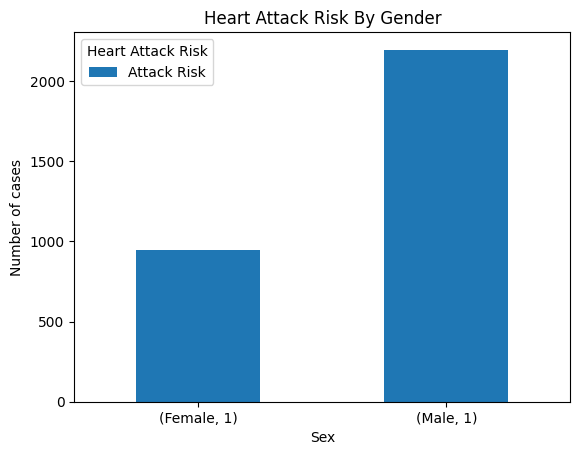

In [107]:
filter_df = df[df['heart_attack_risk']==1]

sex_risk = filter_df.groupby('sex')['heart_attack_risk'].value_counts()

sex_risk.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Number of cases')
plt.title('Heart Attack Risk By Gender')
plt.legend(['Attack Risk'],title='Heart Attack Risk')
plt.xticks(rotation=0)

In [80]:
df.groupby(['sex','heart_attack_risk']).agg({'age':'mean','heart_attack_risk':'size'})

age  heart_attack_risk
sex    heart_attack_risk                              
Female 0                  53.113583               1708
       1                  52.965042                944
Male   0                  53.821246               3916
       1                  54.287927               2195

Text(0.5, 1.0, 'Heart Attack Risk by Age and Gender')

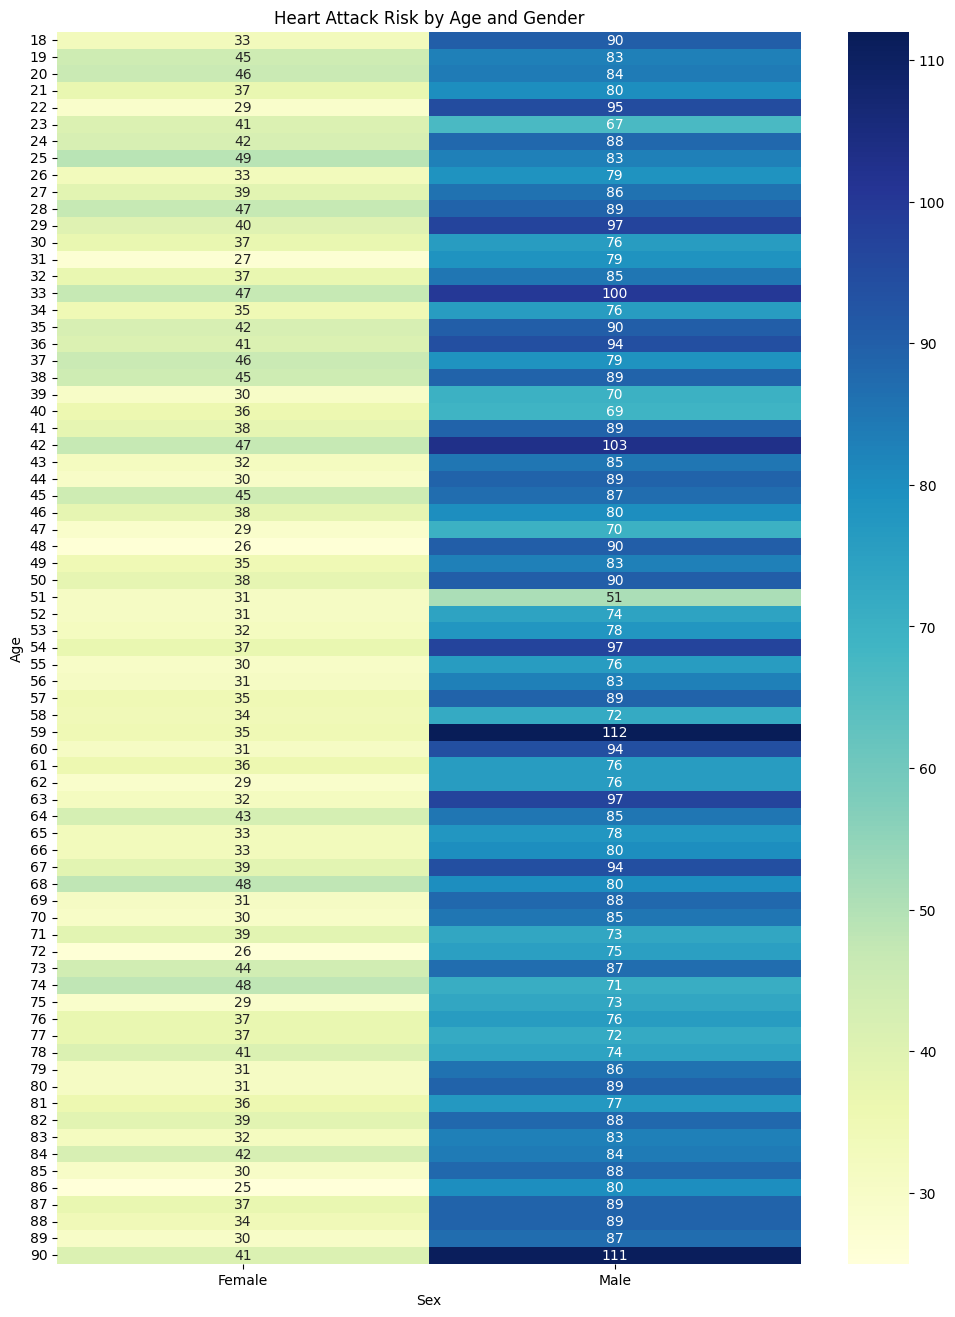

In [81]:
pivot_table = df.pivot_table(index='age', columns='sex', values='heart_attack_risk', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 16))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Heart Attack Risk by Age and Gender')

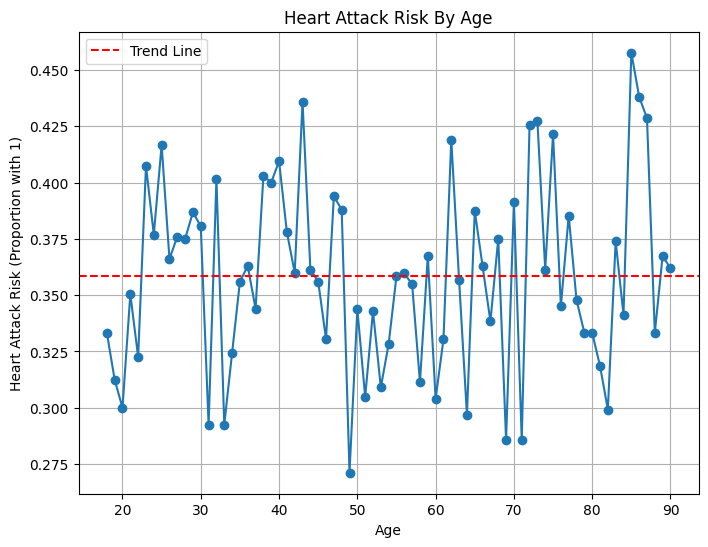

In [82]:
age_risk = df.groupby('age')['heart_attack_risk'].mean()

plt.figure(figsize=(8,6))
plt.plot(age_risk.index, age_risk, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Heart Attack Risk (Proportion with 1)')
plt.title('Heart Attack Risk By Age')
plt.grid(True)

plt.axhline(y=age_risk.mean(), color='r', linestyle='--', label='Trend Line')
plt.legend()

In [83]:
heart_rate_risk = df.groupby('heart_rate')['heart_attack_risk'].mean() * 100
heart_rate_risk.sort_values(ascending=False).head(10)

heart_rate
46     46.400000
71     43.103448
85     43.076923
91     42.982456
82     42.201835
48     42.056075
50     41.322314
62     41.129032
74     41.129032
108    40.983607
Name: heart_attack_risk, dtype: float64

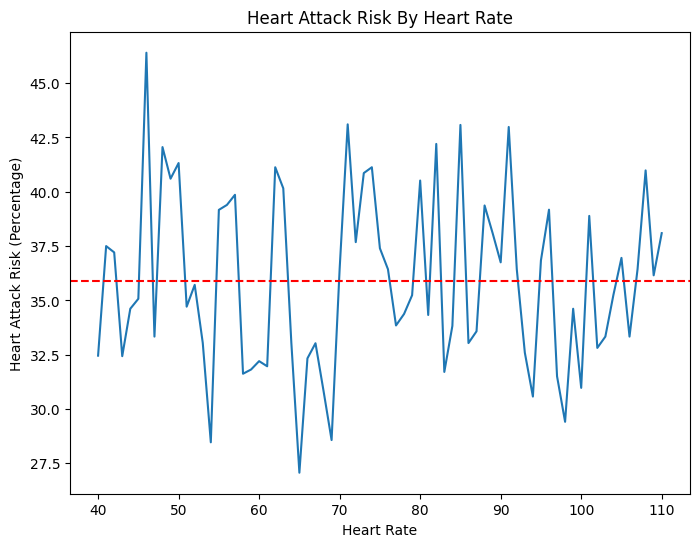

In [108]:
plt.figure(figsize=(8,6))
plt.plot(heart_rate_risk.index, heart_rate_risk)
plt.xlabel('Heart Rate')
plt.ylabel('Heart Attack Risk (Percentage)')
plt.title('Heart Attack Risk By Heart Rate')
plt.grid(False)

plt.axhline(y=heart_rate_risk.mean(), color='r', linestyle='--', label='Trend Line')


In [114]:
correlation_activity = df['activity_per_week'].corr(df['heart_attack_risk'])
correlation_sleep = df['sleep_day'].corr(df['heart_attack_risk'])

In [86]:
correlation_activity


-0.005013511103457134

In [87]:
correlation_sleep


-0.018528217440292323

Text(0.5, 1.0, 'Correlations with Heart Attack Risk')

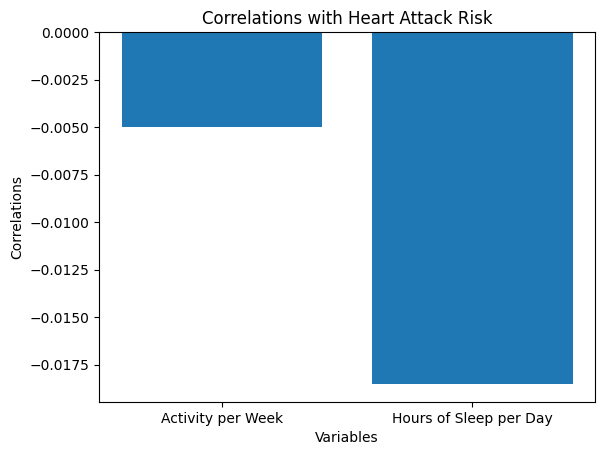

In [88]:
correlations = [correlation_activity, correlation_sleep]
variables = ['Activity per Week', 'Hours of Sleep per Day']

plt.bar(variables, correlations)
plt.xlabel('Variables')
plt.ylabel('Correlations')
plt.title('Correlations with Heart Attack Risk')


(0.0, 100.0)

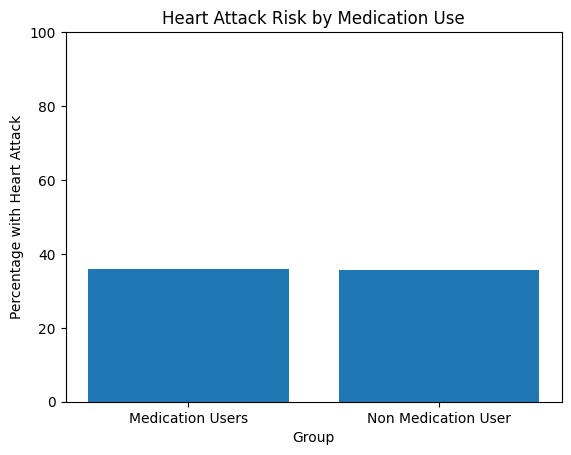

In [89]:
med_user = df[df['medication_use'] == 1]['heart_attack_risk']
non_med_user = df[df['medication_use'] == 0]['heart_attack_risk']

percent_med_user = (med_user.sum() / len(med_user)) * 100
percent_non_med_user = (non_med_user.sum() / len(non_med_user)) * 100

categories = ['Medication Users', 'Non Medication User']
percent = [percent_med_user, percent_non_med_user]

plt.bar(categories, percent)
plt.xlabel('Group')
plt.ylabel('Percentage with Heart Attack')
plt.title('Heart Attack Risk by Medication Use')
plt.ylim(0, 100)

In [90]:
df.columns


Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'fam_hist',
       'smoking', 'alcohol_consu', 'exer_hour_week', 'diet', 'prev_heart_prob',
       'medication_use', 'stress_lvl', 'income', 'BMI', 'triglycerides',
       'activity_per_week', 'sleep_day', 'country', 'continent',
       'heart_attack_risk'],
      dtype='object')

In [91]:
df.groupby('smoking')['heart_attack_risk'].mean() * 100

smoking
0    36.393805
1    35.755185
Name: heart_attack_risk, dtype: float64

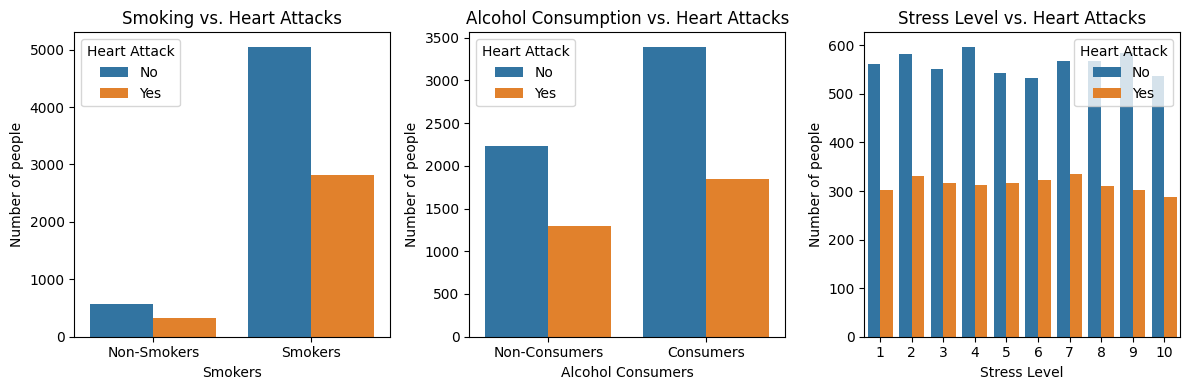

In [109]:
# smoking
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='smoking', hue='heart_attack_risk')
plt.title('Smoking vs. Heart Attacks')
plt.ylabel('Number of people')
plt.xlabel('Smokers')
plt.xticks([0, 1], ['Non-Smokers', 'Smokers'])
plt.legend(['No', 'Yes'], title='Heart Attack')

# alcohol_consu
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='alcohol_consu', hue='heart_attack_risk')
plt.title('Alcohol Consumption vs. Heart Attacks')
plt.ylabel('Number of people')
plt.xlabel('Alcohol Consumers')
plt.xticks([0, 1], ['Non-Consumers', 'Consumers'])
plt.legend(['No', 'Yes'], title='Heart Attack')

# stress_lvl
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='stress_lvl', hue='heart_attack_risk')
plt.title('Stress Level vs. Heart Attacks')
plt.ylabel('Number of people')
plt.xlabel('Stress Level')
plt.legend(['No', 'Yes'], title='Heart Attack')
plt.tight_layout()

In [94]:
df.groupby("alcohol_consu")["heart_attack_risk"].value_counts()

alcohol_consu  heart_attack_risk
0              0                    2232
               1                    1290
1              0                    3392
               1                    1849
Name: heart_attack_risk, dtype: int64

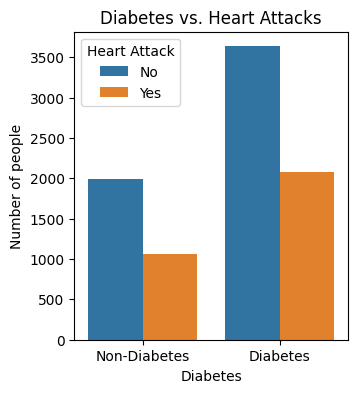

In [111]:
# diabetes
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='diabetes', hue='heart_attack_risk')
plt.title('Diabetes vs. Heart Attacks')
plt.ylabel('Number of people')
plt.xlabel('Diabetes')
plt.xticks([0, 1], ['Non-Diabetes', 'Diabetes'])
plt.legend(['No', 'Yes'], title='Heart Attack')

In [96]:
df.groupby('diabetes')['heart_attack_risk'].value_counts()

diabetes  heart_attack_risk
0         0                    1990
          1                    1057
1         0                    3634
          1                    2082
Name: heart_attack_risk, dtype: int64

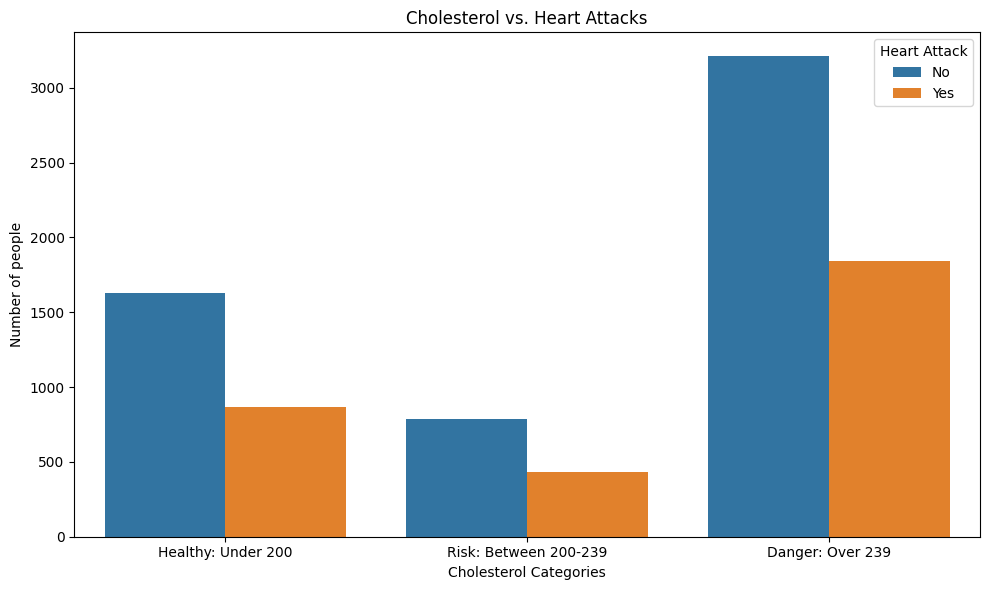

In [97]:
# categories for cholesterol
cholesterol_categories = {
    'Healthy: Under 200': (0, 200),
    'Risk: Between 200-239': (200, 239),
    'Danger: Over 239': (240, float('inf'))
}

# Mapping to categories
df['cholesterol_category'] = df['cholesterol'].apply(lambda x: next(cat for cat, rng in cholesterol_categories.items() if rng[0] <= x <= rng[1]))

category_order = ['Healthy: Under 200','Risk: Between 200-239','Danger: Over 239']

# cholesterol vs. Heart Attacks
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cholesterol_category', hue='heart_attack_risk', order=category_order)
plt.title('Cholesterol vs. Heart Attacks')
plt.ylabel('Number of people')
plt.xlabel('Cholesterol Categories')
plt.legend(['No', 'Yes'], title='Heart Attack')

plt.tight_layout()

In [112]:
df.groupby('cholesterol_category')['heart_attack_risk'].value_counts()


cholesterol_category   heart_attack_risk
Danger: Over 239       0                    3210
                       1                    1844
Healthy: Under 200     0                    1626
                       1                     864
Risk: Between 200-239  0                     788
                       1                     431
Name: heart_attack_risk, dtype: int64

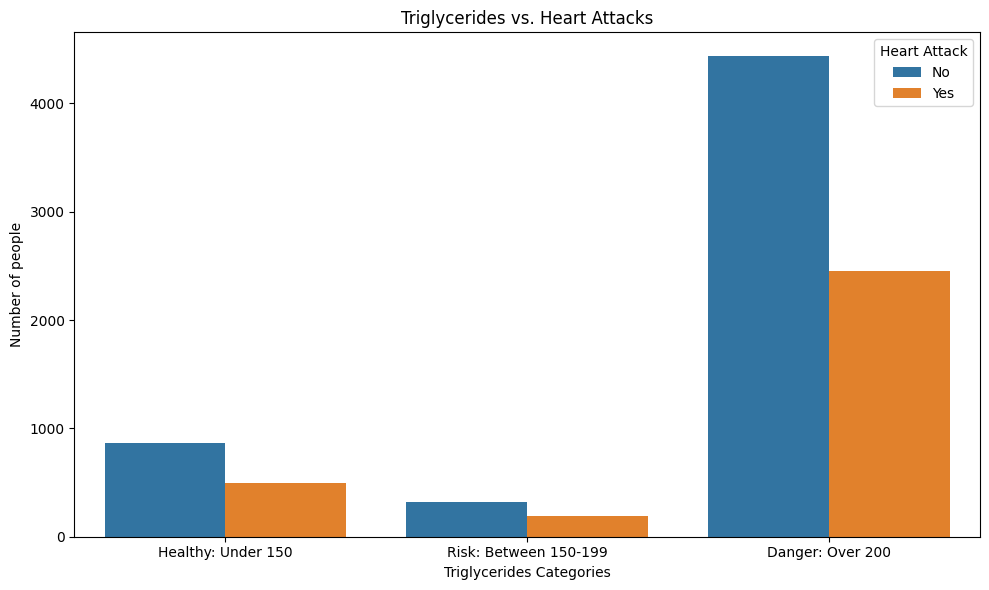

In [99]:
# categories for triglycerides
triglycerides_categories = {
    'Healthy: Under 150': (0, 150),
    'Risk: Between 150-199': (150, 199),
    'Danger: Over 200': (200, float('inf'))
}

# Mapping to categories
df['triglycerides_category'] = df['triglycerides'].apply(lambda x: next(cat for cat, rng in triglycerides_categories.items() if rng[0] <= x <= rng[1]))

category_order = ['Healthy: Under 150','Risk: Between 150-199','Danger: Over 200']

# triglycerides vs. Heart Attacks
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='triglycerides_category', hue='heart_attack_risk',order=category_order)
plt.title('Triglycerides vs. Heart Attacks')
plt.ylabel('Number of people')
plt.xlabel('Triglycerides Categories')
plt.legend(['No', 'Yes'], title='Heart Attack')

plt.tight_layout()

In [100]:
df.groupby('diet')['BMI'].mean()

diet
Average      28.867128
Healthy      28.993248
Unhealthy    28.811708
Name: BMI, dtype: float64

([<matplotlib.axis.XTick at 0x7b7739b891b0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

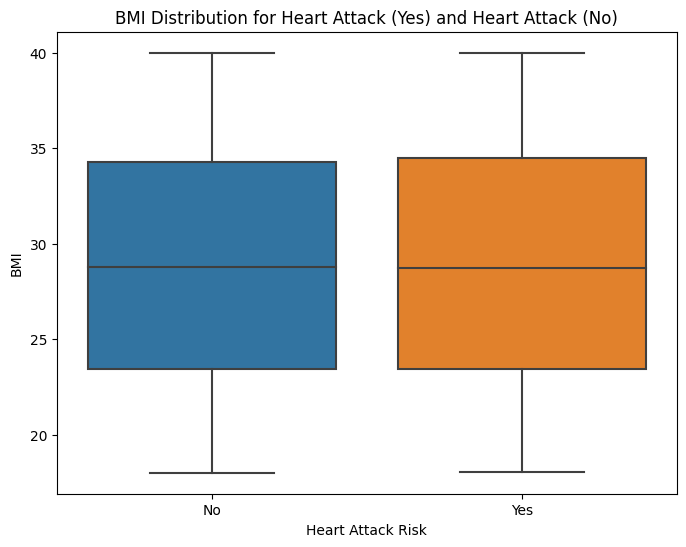

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_attack_risk', y='BMI', data=df)
plt.title('BMI Distribution for Heart Attack (Yes) and Heart Attack (No)')
plt.xlabel('Heart Attack Risk')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No', 'Yes'])

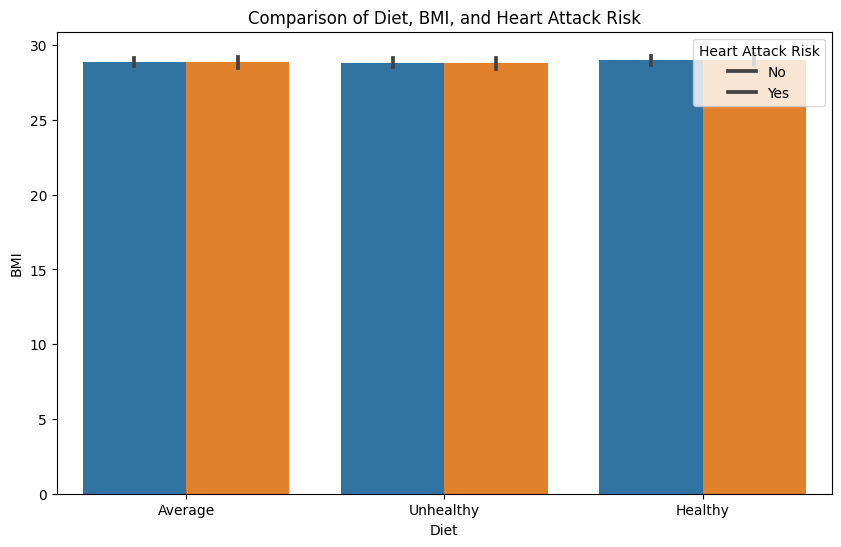

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x='diet', y='BMI', hue='heart_attack_risk', data=df)
plt.title('Comparison of Diet, BMI, and Heart Attack Risk')
plt.xlabel('Diet')
plt.ylabel('BMI')
plt.legend(title='Heart Attack Risk', loc='upper right', labels=['No', 'Yes'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Australia')])

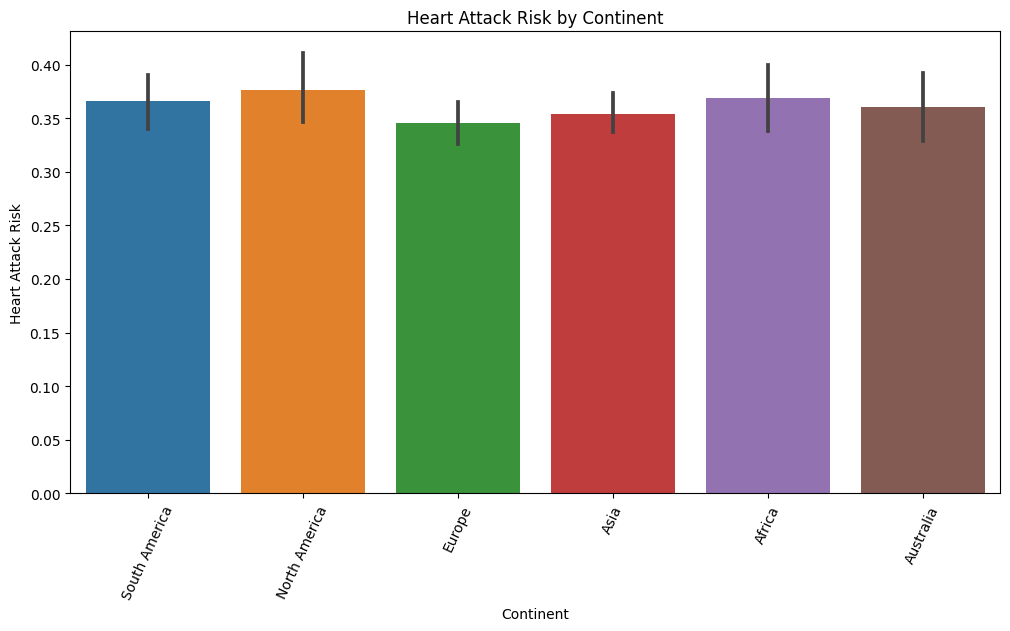

In [115]:
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='heart_attack_risk', data=df)
plt.title('Heart Attack Risk by Continent')
plt.xlabel('Continent')
plt.ylabel('Heart Attack Risk')
plt.xticks(rotation=65)

In [104]:
df[df['heart_attack_risk']==1].groupby('continent')['heart_attack_risk'].value_counts()

continent      heart_attack_risk
Africa         1                    322
Asia           1                    900
Australia      1                    319
Europe         1                    775
North America  1                    324
South America  1                    499
Name: heart_attack_risk, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South America')])

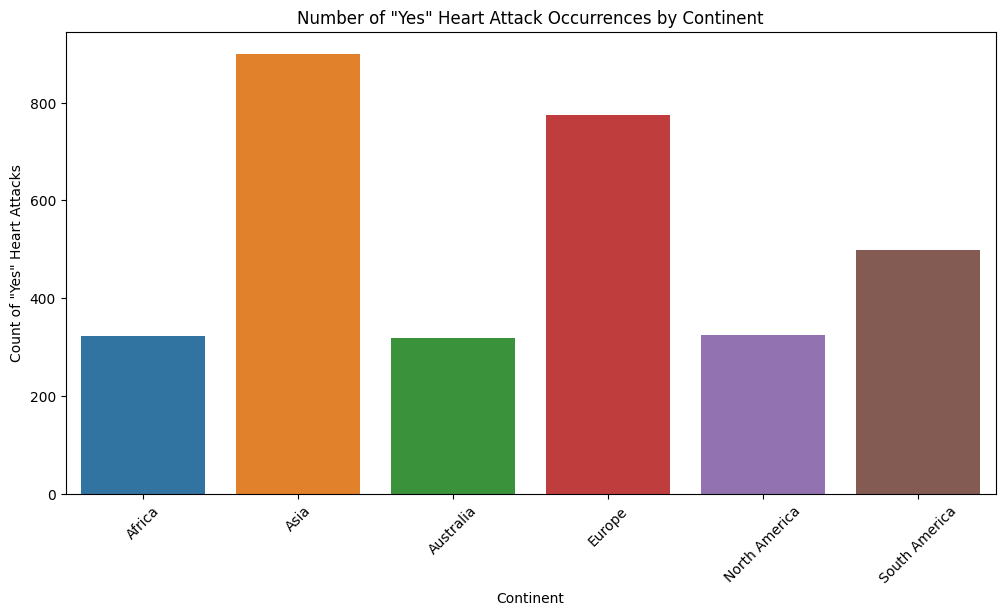

In [116]:
yes_heart_attacks = df[df['heart_attack_risk'] == 1]

#continent by heart_attack_risk
heart_attack_counts = yes_heart_attacks.groupby('continent')['heart_attack_risk'].value_counts().unstack(fill_value=0)

#heart attacks by continent
plt.figure(figsize=(12, 6))
sns.barplot(data=heart_attack_counts.reset_index(), x='continent', y=1)
plt.title('Number of "Yes" Heart Attack Occurrences by Continent')
plt.xlabel('Continent')
plt.ylabel('Count of "Yes" Heart Attacks')
plt.xticks(rotation=45)

In [106]:
df.groupby('continent').size().reset_index().rename(columns={0:'No. People'})

,continent,No. People
0,Africa,873
1,Asia,2543
2,Australia,884
3,Europe,2241
4,North America,860
5,South America,1362
